# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset.

In this section, you should:

- [x] Inspect the shapes of the training and test sets to confirm their size and structure.
- [x] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [x] Visualize a few images from the dataset to understand what the data looks like.

In [1]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# Inspect the shapes of the datasets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)



X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


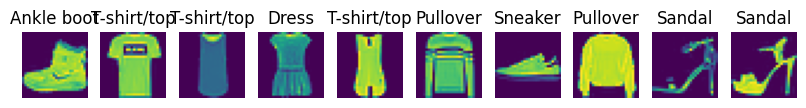

In [3]:
# Verify the data looks as expected
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')
plt.show()

Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

**Your answer here**

Images look fine, easy to distinguish between 2 unique objects like, shoes and t-shirt, but does not have finer details, so that one can distinguish between hoodies and pullovers.

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [x] Create a simple linear regression model using Keras.
- [x] Compile the model with an appropriate loss function and optimizer.
- [x] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Create a simple linear regression model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='softmax'))

# Compile the model using `model.compile()`
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with `model.fit()`
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

# Evaluate the model with `model.evaluate()`
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6371 - loss: 1.1546 - val_accuracy: 0.7872 - val_loss: 0.6565
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7962 - loss: 0.6321 - val_accuracy: 0.8067 - val_loss: 0.5811
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8139 - loss: 0.5672 - val_accuracy: 0.8184 - val_loss: 0.5446
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8224 - loss: 0.5415 - val_accuracy: 0.8248 - val_loss: 0.5221
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8279 - loss: 0.5183 - val_accuracy: 0.8282 - val_loss: 0.5083
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8333 - loss: 0.5020 - val_accuracy: 0.8304 - val_loss: 0.4991
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8342 - loss: 0.4929 - val_accuracy: 0.8342 - val_loss: 0.4875
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8394 - loss: 0.4733 - 

Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

**Your answer here**

Test accuracy with base model is almost 83%, which is extraordinary. My expectations was somewhere is 60s, so it faired really well. Performance can be imporoved with more layers and/or better optimizer.

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [5]:
from keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Reshape the data to include the channel dimension
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model_cnn = Sequential()
model_cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_cnn.add(Flatten())
model_cnn.add(Dense(10, activation='softmax'))

# Compile the model
model_cnn.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
history_cnn = model_cnn.fit(X_train_cnn, y_train,
                             epochs=15,
                             batch_size=32,
                             validation_split=0.2,
                             callbacks=[early_stop])
# Evaluate the model
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(X_test_cnn, y_test)
print(f'Test accuracy: {test_acc_cnn}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8095 - loss: 0.5420 - val_accuracy: 0.8817 - val_loss: 0.3257
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8928 - loss: 0.2988 - val_accuracy: 0.8823 - val_loss: 0.3226
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9089 - loss: 0.2533 - val_accuracy: 0.8970 - val_loss: 0.2921
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9207 - loss: 0.2199 - val_accuracy: 0.8988 - val_loss: 0.2904
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9305 - loss: 0.1969 - val_accuracy: 0.8988 - val_loss: 0.2938
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9360 - loss: 0.1791 - val_accuracy: 0.9035 - val_loss: 0.2891
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9438 - loss: 0.1570 - val_accuracy: 0.9019 - val_loss: 0.2968
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9489 - loss: 0.1451 - 

Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

**Your answer here**

Accuracy increased from 83% to 89%. CNN model is looking at image with more details. This model recognized shapes and patterns much bettern than base model.

# 4. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [x] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [x] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [x] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [x] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [6]:
# A. Test Hyperparameters
import pandas as pd
from tensorflow.keras.layers import Dropout

# Define the hyperparameter values to test
filters_list = [16, 32, 64]        # Number of filters in the Conv2D layer
dropout_options = [False, True]   # With and without Dropout layer

# Empty list to store the results
results = []

# Loop through each combination of filters and dropout
for filters in filters_list:
    for use_dropout in dropout_options:

        # Build a new model from scratch for each configuration
        model = Sequential()
        model.add(Conv2D(filters=filters, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

        # Add Dropout if enabled
        if use_dropout:
            model.add(Dropout(0.3))

        # Add output layers
        model.add(Flatten())
        model.add(Dense(10, activation='softmax'))

        # Compile the model
        model.compile(optimizer=Adam(),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        # Early stopping to prevent overfitting
        early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

        # Train the model
        history = model.fit(X_train_cnn, y_train,
                            epochs=10,
                            batch_size=64,
                            validation_split=0.2,
                            verbose=1,
                            callbacks=[early_stop])

        # Evaluate the model on the test set
        test_loss, test_acc = model.evaluate(X_test_cnn, y_test, verbose=0)

        # Store the results
        results.append({
            'filters': filters,
            'dropout': use_dropout,
            'test_accuracy': round(test_acc, 4),
            'test_loss': round(test_loss, 4)
        })

# Create a table to show the results
results_df = pd.DataFrame(results)
print(results_df)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7726 - loss: 0.6402 - val_accuracy: 0.8662 - val_loss: 0.3830
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8810 - loss: 0.3487 - val_accuracy: 0.8833 - val_loss: 0.3291
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8959 - loss: 0.2945 - val_accuracy: 0.8871 - val_loss: 0.3222
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9045 - loss: 0.2707 - val_accuracy: 0.8925 - val_loss: 0.3003
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9125 - loss: 0.2458 - val_accuracy: 0.8953 - val_loss: 0.2969
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9161 - loss: 0.2305 - val_accuracy: 0.8974 - val_loss: 0.2940
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9245 - loss: 0.2138 - val_accuracy: 0.8978 - val_loss: 0.2953
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9261 - loss: 0.2056 - val_accuracy: 0.

In [7]:
# B. Test presence or absence of regularization

Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

**Your answer here**

I tested with different filters and dropouts. The results are:

- Filters: 16 and Dropout: False:
    - Test Accuracy: 88.85%
    - Test Loss: 30.78%

- Filters: 16 and Dropout: True:
    - Test Accuracy: 89.39%
    - Test Loss: 29.88%

- Filters: 32 and Dropout: False:
    - Test Accuracy: 89.59%
    - Test Loss: 29.73%

- Filters: 32 and Dropout: True:
    - Test Accuracy: 89.39%
    - Test Loss: 29.71%

- Filters: 64 and Dropout: False:
    - Test Accuracy: 89.43%
    - Test Loss: 29.61%

- Filters: 64 and Dropout: True:
    - Test Accuracy: 89.76%
    - Test Loss: 29.67%

When we don't perform dropout, then test accuracy increases, best with 32 filters.

When we perform dropouts, then test accuracy increases besy with 64 filters.

The best model is with 64 filters and dropout enabled.

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [x] Compile the final model with the best hyperparameters and regularization techniques.
- [x] Train the final model on the training set and evaluate it on the test set.
- [x] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build final model (best combo: 64 filters, dropout)
model_final = Sequential()
model_final.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Dropout(0.3))
model_final.add(MaxPooling2D(pool_size=(2, 2)))
model_final.add(Flatten())
model_final.add(Dense(64, activation='relu'))
model_final.add(Dense(10, activation='softmax'))

model_final.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

model_final.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate on test set
final_loss, final_accuracy = model_final.evaluate(X_test, y_test)
print(f"Final Test Accuracy: {final_accuracy:.4f}")
print(f"Final Test Loss: {final_loss:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8036 - loss: 0.5502 - val_accuracy: 0.8882 - val_loss: 0.3074
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8977 - loss: 0.2850 - val_accuracy: 0.8964 - val_loss: 0.2859
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9146 - loss: 0.2360 - val_accuracy: 0.9062 - val_loss: 0.2564
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9270 - loss: 0.1966 - val_accuracy: 0.9021 - val_loss: 0.2679
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9379 - loss: 0.1670 - val_accuracy: 0.9084 - val_loss: 0.2647
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9484 - loss: 0.1460 - val_accuracy: 0.9079 - val_loss: 0.2659
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9556 - loss: 0.1224 - val_accuracy: 0.9122 - val_loss: 0.2549
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9623 - loss: 0.1063 - 

Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

**Your answer here**

Final model gave test accuracy of 91.17%
Baseline gave test accuracy of 83%

There is a huge difference of 8.17%

Final model performance is tied to number of dropout and increase in the number of filters to 64.

Considering ample time and resources, I would test for more filters, different dropout strategies and adding more Conv2d layers.

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 06/07/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [x] Created a branch with the correct naming convention.
- [x] Ensured that the repository is public.
- [x] Reviewed the PR description guidelines and adhered to them.
- [x] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-6-ml-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.